In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import random
import pandas as pd
import numpy as np

SEED = 43
random.seed(SEED)
np.random.seed(SEED)

In [2]:
from dataset import get_data

In [3]:
DATA_PATH = "../data/kaggle_data/"

In [4]:
# make dataset

def data_extract(df_dict, df, name, cols):
       for col in cols:
              df_dict[f"{name}_{col}"] = df.loc[df[col] != 0, col]
       return df_dict

train_data_list = []
val_data_list = []

pmj_df = pd.read_csv(DATA_PATH + "pjm_elec_daily.csv")
pmj_cols = ['AEP', 'COMED', 'DAYTON', 'DEOK', 'DOM', 'DUQ', 'FE', 'NI', 'PJME', 'PJMW'] # 'PJM_Load', 'EKPC'

df_dict = {}

df_dict = data_extract(df_dict, pmj_df, 'PMJ', pmj_cols)

for df_name in df_dict:
    df = df_dict[df_name]
    train_data, val_data, scaler = get_data(df)
    print(df_name, len(train_data), len(val_data))
    train_data_list.append((train_data, df_name, scaler))
    val_data_list.append((val_data, df_name, scaler))

PMJ_AEP 4044 1011
PMJ_COMED 2217 555
PMJ_DAYTON 4044 1011
PMJ_DEOK 1925 482
PMJ_DOM 3874 969
PMJ_DUQ 3970 993
PMJ_FE 2096 525
PMJ_NI 1949 488
PMJ_PJME 4847 1212
PMJ_PJMW 4775 1194


In [5]:
tmp_data, t, scaler = train_data_list[0]

In [6]:
tmp_data = pd.DataFrame(tmp_data)

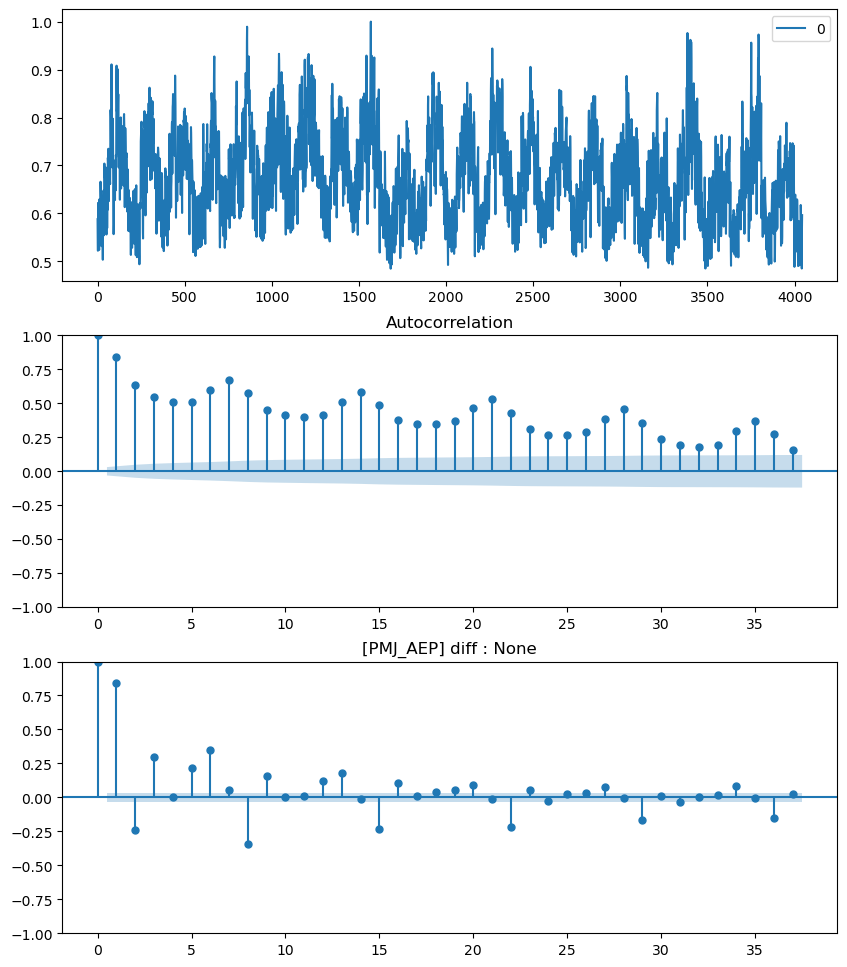

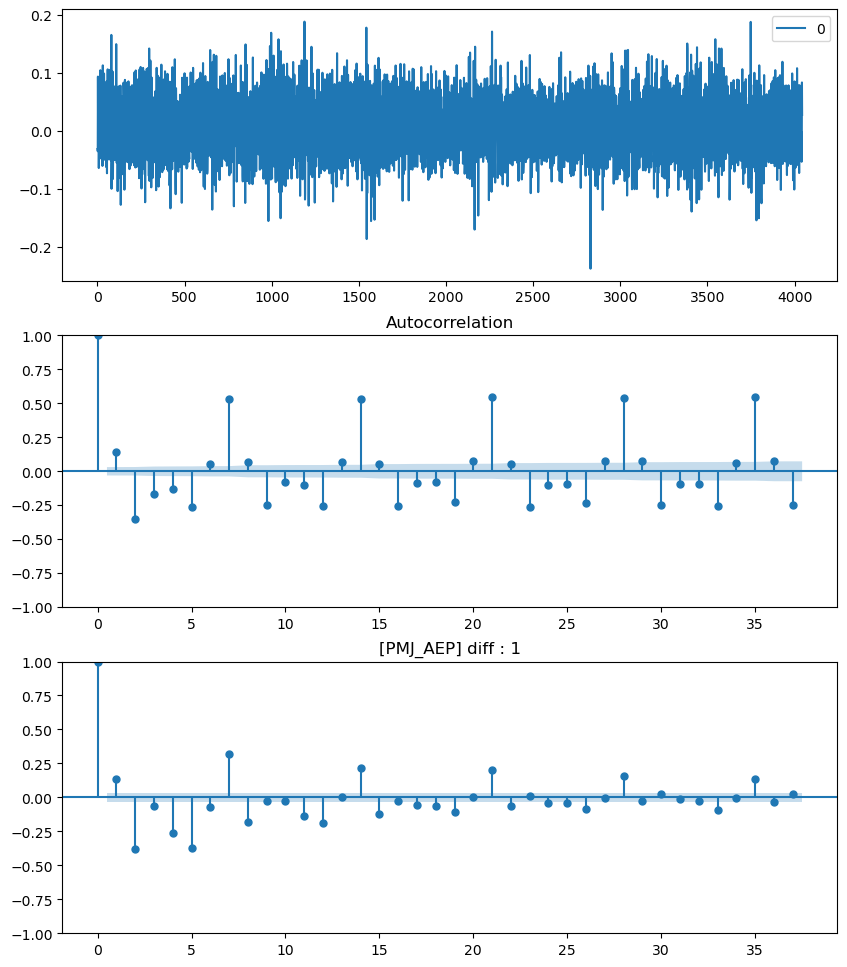

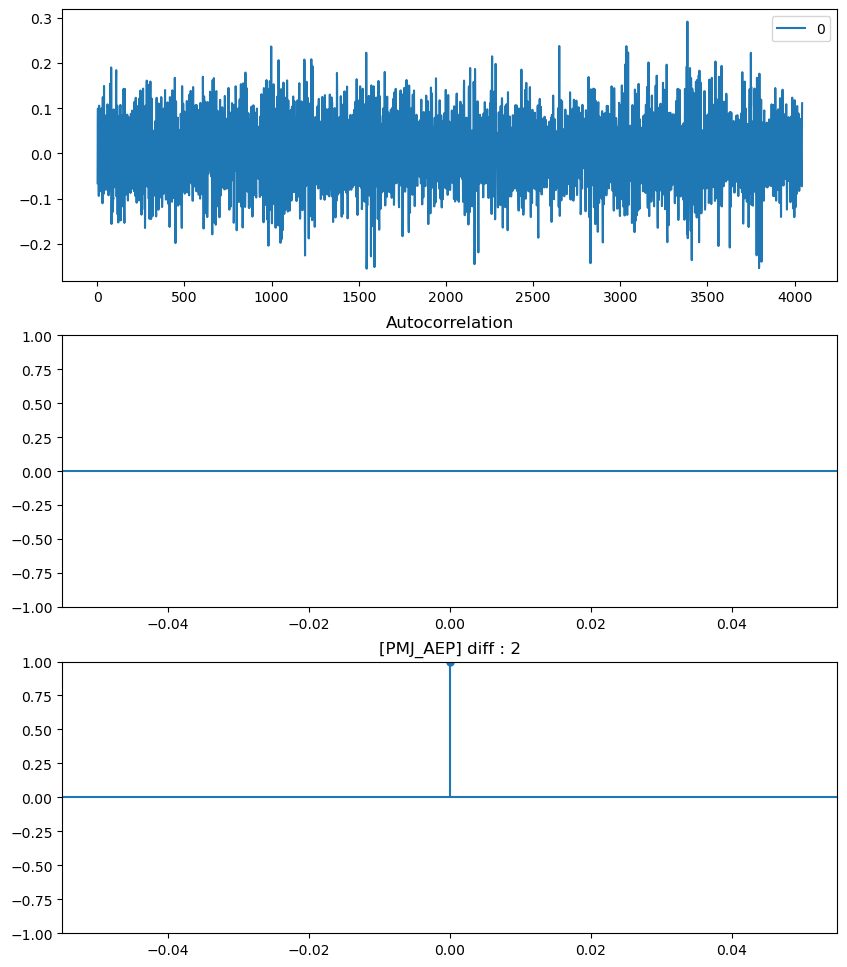

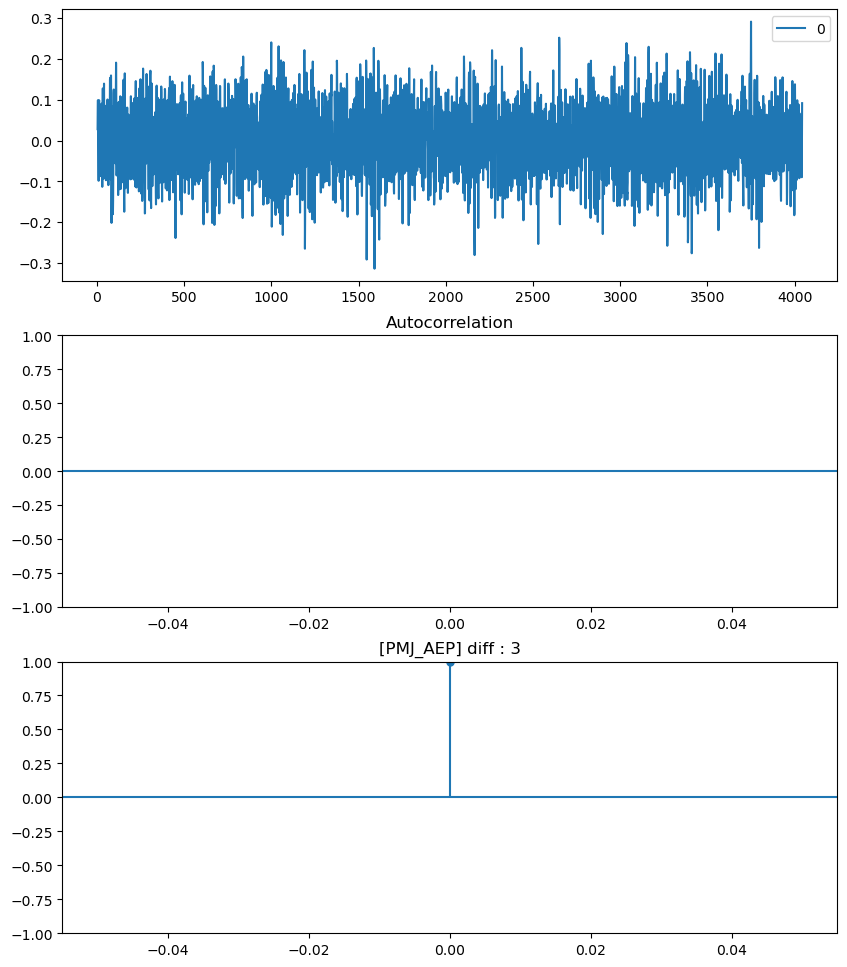

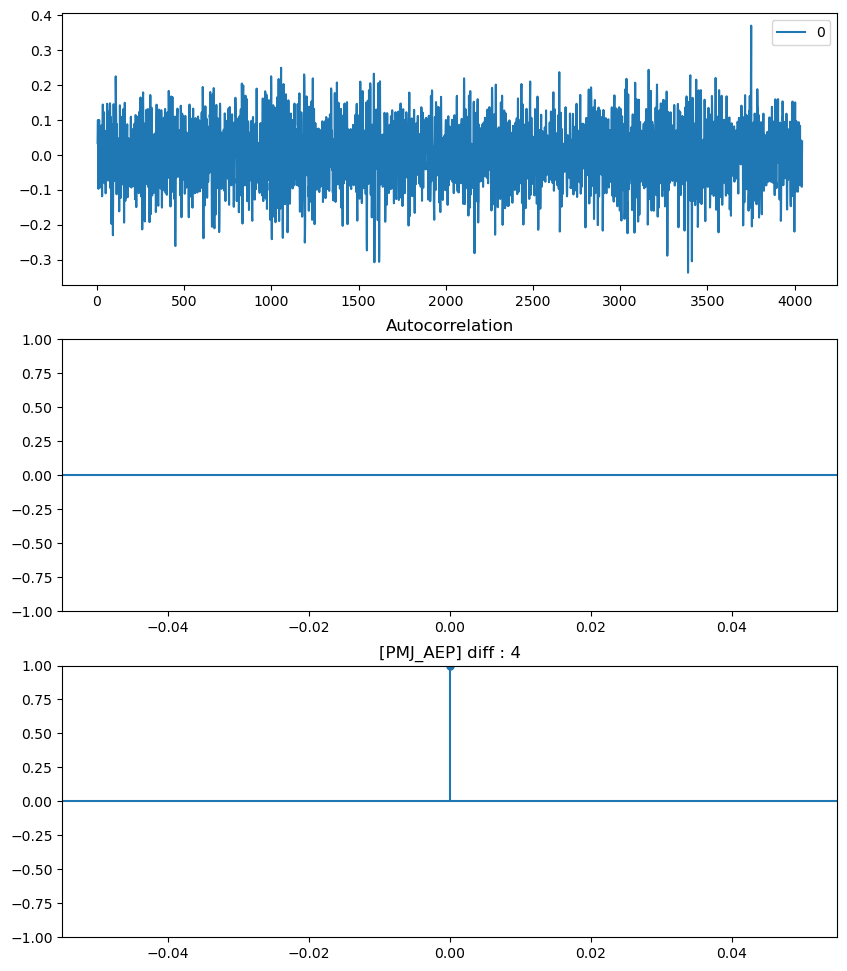

In [19]:
from util import plot_ac
diff = [1, 2, 3, 4]
for tmp_data, t, scaler in train_data_list[:1]:
    tmp_data = pd.DataFrame(tmp_data)
    plot_ac(tmp_data, t, diff, data=True, acf=True, pacf=True)

In [14]:
from statsmodels.tsa.arima.model import ARIMA
orders = [(1, 2, 0), (2, 2, 0), ()]
for order in orders:
    model = ARIMA(tmp_data, order=order)
    model_fit = model.fit()
    print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                 4044
Model:                 ARIMA(1, 2, 0)   Log Likelihood                5399.034
Date:                Fri, 03 May 2024   AIC                         -10794.069
Time:                        16:26:56   BIC                         -10781.460
Sample:                             0   HQIC                        -10789.601
                               - 4044                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2164      0.015    -14.629      0.000      -0.245      -0.187
sigma2         0.0040   8.39e-05     48.246      0.000       0.004       0.004
Ljung-Box (L1) (Q):                  39.29   Jarque-

In [20]:
forecast = model_fit.forecast(steps=1011)

In [21]:
forecast.name = 0

In [22]:
pd.concat([tmp_data, forecast])

,0
0,0.588025
1,0.557012
2,0.522250
3,0.615901
4,0.621779
...,...
5050,26.208564
5051,26.234014
5052,26.259464
5053,26.284913


4044     0.594720
4045     0.627701
4046     0.663178
4047     0.682039
4048     0.704995
          ...    
5050    26.208564
5051    26.234014
5052    26.259464
5053    26.284913
5054    26.310363
Name: 0, Length: 1011, dtype: float64


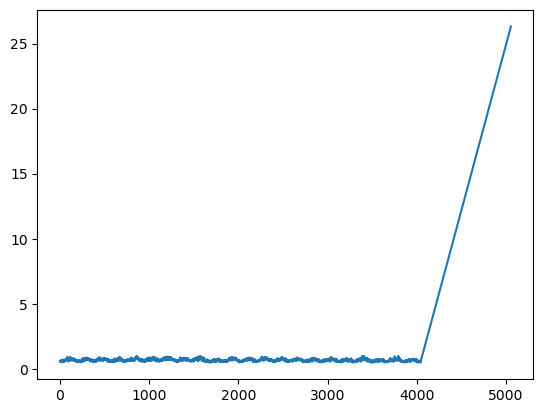

In [23]:
import matplotlib.pyplot as plt

print(forecast)
plt.plot(pd.concat([tmp_data, forecast]))
# forecast.plot()